In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [40]:
from geopy import distance

In [41]:
df=pd.read_csv("YourCabs.csv")
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [42]:
df.shape

(43431, 18)

In [43]:
data = df.drop(['Car_Cancellation'], axis=1)
target = df[['Car_Cancellation']]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [45]:
data.isnull().mean()

id                     0.000000
user_id                0.000000
vehicle_model_id       0.000000
travel_type_id         0.000000
package_id             0.826161
from_area_id           0.002026
to_area_id             0.210403
from_city_id           0.623656
to_city_id             0.963436
from_date              0.000000
online_booking         0.000000
mobile_site_booking    0.000000
booking_created        0.000000
from_lat               0.002141
from_long              0.002141
to_lat                 0.210403
to_long                0.210403
dtype: float64

In [46]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id'],axis=1)

In [47]:
data.shape

(43431, 11)

In [48]:
data['vehicle_model_id'].value_counts(normalize=True)*100

vehicle_model_id
12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
43     0.004605
1      0.004605
76     0.002303
69     0.002303
14     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: proportion, dtype: float64

In [49]:
data=data.drop(['vehicle_model_id'],axis=1)

In [50]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


In [51]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [52]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

In [53]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

In [54]:
data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [56]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [57]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)

In [58]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [60]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,02-10-2013 16:30,1,0,02-10-2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,03-04-2013 07:00,0,0,03-02-2013 17:48,12.968887,77.63575,NaN,NaN


In [61]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

from_area_id
1397.0    90
1396.0     3
17.0       2
173.0      2
1215.0     1
483.0      1
1265.0     1
215.0      1
802.0      1
1080.0     1
1164.0     1
178.0      1
Name: count, dtype: int64

In [62]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43431 non-null  float64
 9   to_long              43431 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [64]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [65]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [66]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [67]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [68]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [69]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [70]:
data['from_date_dt'] = pd.to_datetime(data['from_date'], errors='coerce').dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date'], errors='coerce').dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created'], errors='coerce').dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created'], errors='coerce').dt.strftime('%H:%M')


In [71]:
# Step 1: Convert to datetime (if not already)
data['from_date_dt'] = pd.to_datetime(data['from_date_dt'], errors='coerce')
data['booking_created_dt'] = pd.to_datetime(data['booking_created_dt'], errors='coerce')

# Step 2: Extract day names
data['from_date_day'] = data['from_date_dt'].dt.day_name()
data['booking_created_day'] = data['booking_created_dt'].dt.day_name()

# Step 3: Extract month names
data['from_date_month'] = data['from_date_dt'].dt.month_name()
data['booking_created_month'] = data['booking_created_dt'].dt.month_name()

# Step 4: Label weekends vs weekdays
data['from_date_week'] = np.where(
    data['from_date_day'].isin(['Saturday', 'Sunday']),
    'Weekend',
    'Weekday'
)

data['booking_created_week'] = np.where(
    data['booking_created_day'].isin(['Saturday', 'Sunday']),
    'Weekend',
    'Weekday'
)

# Step 5: Calculate time gap between booking and trip
data['booking_to_trip_gap_days'] = (data['from_date_dt'] - data['booking_created_dt']).dt.days


In [73]:
# Step: Create time-based session categories from 'from_time_tm'
cond = [
    pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(5, 8),
    pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(9, 12),
    pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(13, 16),
    pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(17, 20),
    (pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(21, 23)) |
    (pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour == 0),
    pd.to_datetime(data['from_time_tm'], errors='coerce').dt.hour.between(1, 4)
]

values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

data['from_date_session'] = np.select(cond, values, default='Unknown')


In [74]:
cond = [
    pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(5, 8),
    pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(9, 12),
    pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(13, 16),
    pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(17, 20),
    (pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(21, 23)) |
    (pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour == 0),
    pd.to_datetime(data['booking_created_tm'], errors='coerce').dt.hour.between(1, 4)
]

values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

data['booking_created_session'] = np.select(cond, values, default='Unknown')


In [78]:
data['from_date'] = pd.to_datetime(data['from_date'], format='mixed', errors='coerce')
data['booking_created'] = pd.to_datetime(data['booking_created'], format='mixed', errors='coerce')

# Then calculate time difference in minutes
data['time_diff'] = (data['from_date'] - data['booking_created']).dt.total_seconds() / 60




In [79]:
data[data['time_diff'] < 0].head()



,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,booking_to_trip_gap_days,from_date_session,booking_created_session,time_diff
1763,1298.0,2013-01-20 14:15:00,0,0,2013-01-20 15:01:00,False,True,8.482630,NaT,NaN,...,NaN,NaN,NaN,NaN,Weekday,Weekday,NaN,Unknown,Unknown,-46.0
2990,393.0,2013-02-01 09:45:00,0,0,2013-02-01 13:18:00,False,True,28.576256,2013-02-01,09:45,...,Friday,Friday,February,February,Weekday,Weekday,0.0,Morning,Afternoon,-213.0
4228,571.0,2013-02-13 18:00:00,0,0,2013-02-13 18:29:00,False,True,5.866543,NaT,NaN,...,NaN,NaN,NaN,NaN,Weekday,Weekday,NaN,Unknown,Unknown,-29.0
5303,1068.0,2013-02-23 18:00:00,0,0,2013-02-23 18:03:00,False,True,3.547502,NaT,NaN,...,NaN,NaN,NaN,NaN,Weekday,Weekday,NaN,Unknown,Unknown,-3.0
6106,1010.0,2013-03-04 00:30:00,0,0,2013-03-04 02:00:00,False,True,10.133543,2013-03-04,00:30,...,Monday,Monday,March,March,Weekday,Weekday,0.0,Night,Late Night,-90.0


In [80]:
data[data['time_diff'] < 0]['time_diff'].count()


np.int64(42)

In [81]:
data = data.drop(['from_date','booking_created'],axis=1)

In [82]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [83]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [85]:
cond = [
    data['from_area_id'].astype('float').between(0, 0.33),
    data['from_area_id'].astype('float').between(0.34, 0.66),
    data['from_area_id'].astype('float').between(0.67, 1.0)
]

values = ['Low Cancellation', 'Medium Cancellation', 'High Cancellation']

# Set default as string to match choice types
data['from_area_risk'] = np.select(cond, values, default='Unknown')


In [86]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,booking_to_trip_gap_days,from_date_session,booking_created_session,time_diff,from_area_risk
0,0.00,0,0,True,False,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,0.0,Late Night,Late Night,21.0,Low Cancellation
1,0.00,0,0,True,False,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,0.0,Morning,Late Night,395.0,Low Cancellation
2,0.13,0,0,True,False,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,0.0,Late Night,Late Night,22.0,Low Cancellation
3,0.00,0,0,True,False,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,0.0,Early Morning,Late Night,66.0,Low Cancellation
4,0.00,0,0,True,False,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,0.0,Morning,Early Morning,67.0,Low Cancellation


In [90]:
data['from_area_id'].value_counts()

from_area_id
0.00    43026
0.07       35
0.05       35
0.06       33
0.04       30
0.09       30
0.08       20
0.11       20
0.03       17
0.10       17
0.12       17
0.13       16
0.17       16
0.14       16
0.02       13
0.25        9
0.01        9
0.20        8
0.16        8
0.33        7
0.15        6
0.18        5
0.19        5
0.21        4
0.50        4
0.30        4
0.40        3
0.22        3
0.67        3
0.27        2
0.80        1
1.00        1
0.53        1
0.44        1
0.32        1
0.34        1
0.23        1
0.28        1
0.45        1
0.29        1
Name: count, dtype: int64

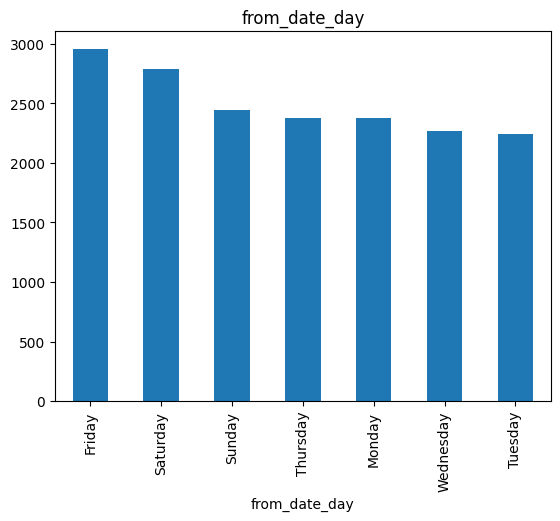

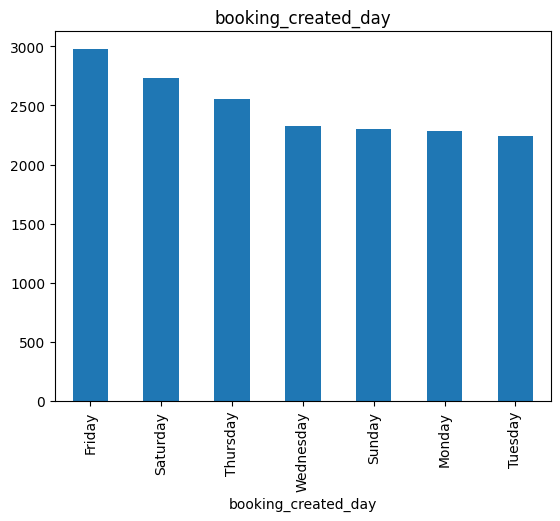

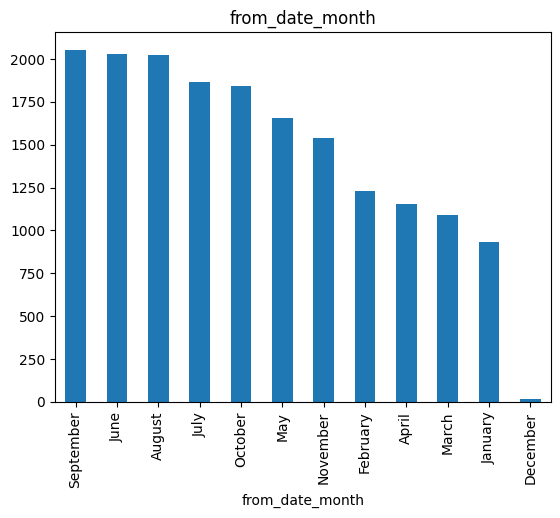

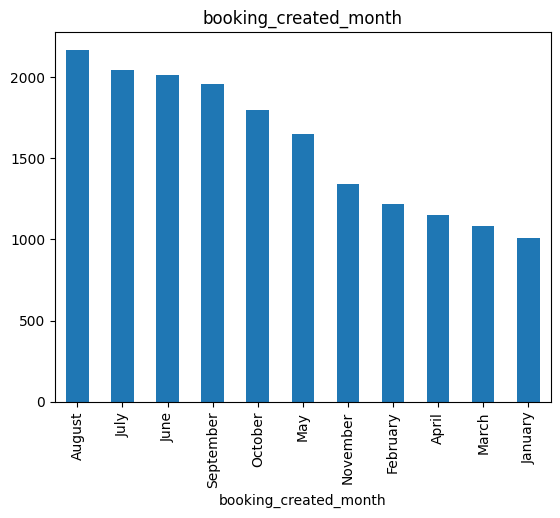

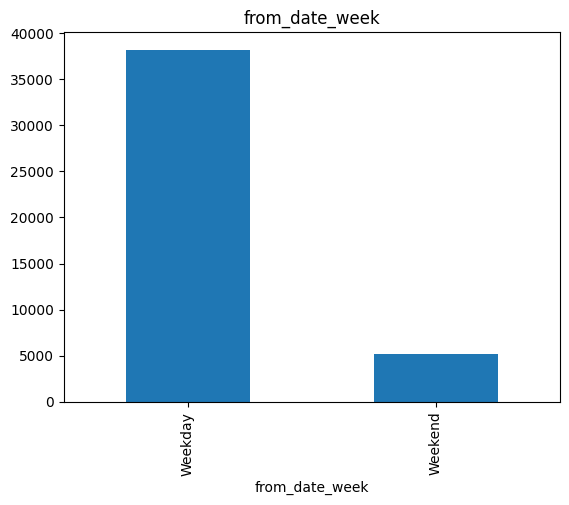

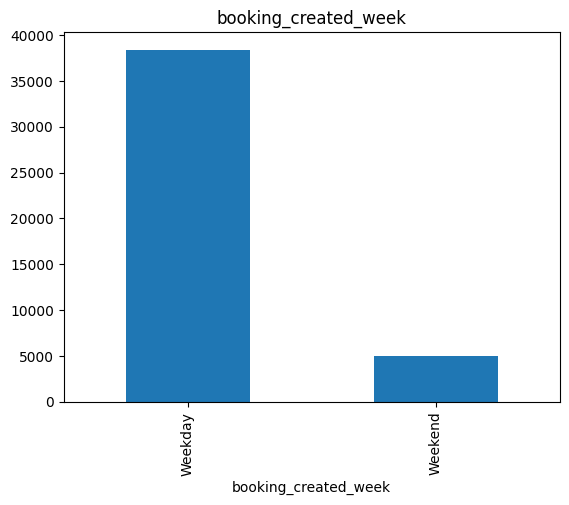

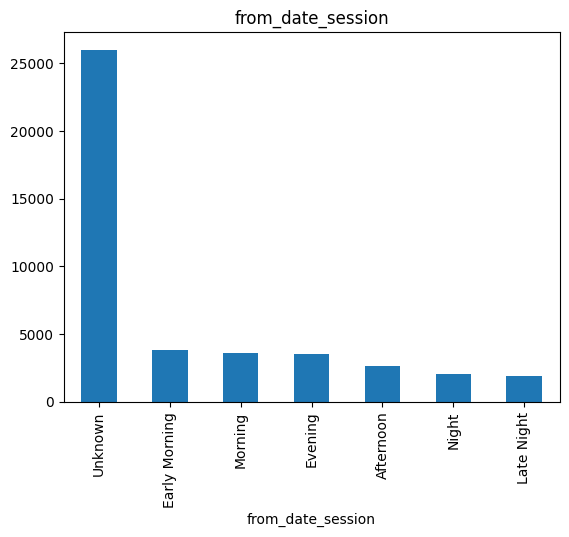

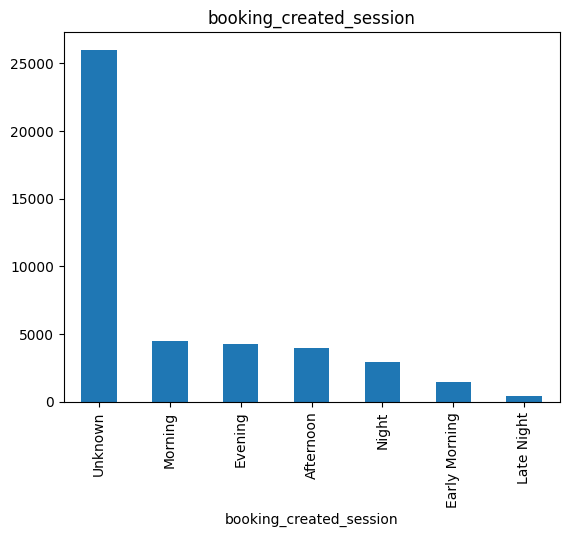

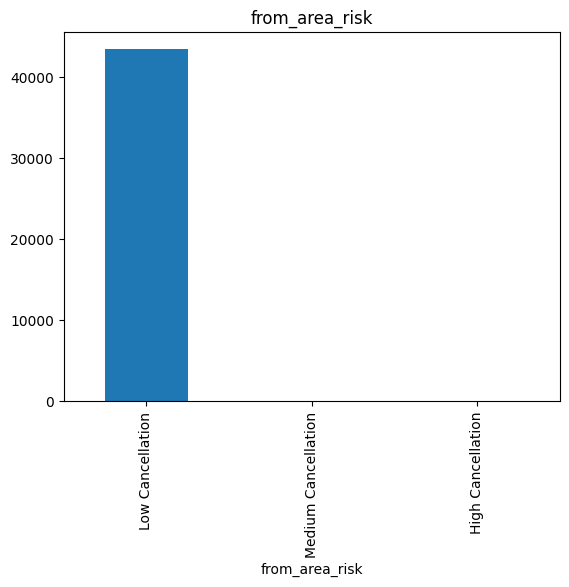

In [91]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [92]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')



In [93]:
num.head()

,from_area_id,online_booking,mobile_site_booking,distance,booking_to_trip_gap_days,time_diff
0,0.00,0,0,3.980687,0.0,21.0
1,0.00,0,0,14.004432,0.0,395.0
2,0.13,0,0,12.648909,0.0,22.0
3,0.00,0,0,9.534596,0.0,66.0
4,0.00,0,0,14.655467,0.0,67.0


In [94]:
char.head()

,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,from_area_risk
0,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,Low Cancellation
1,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,Low Cancellation
2,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,Low Cancellation
3,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,Low Cancellation
4,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,Low Cancellation


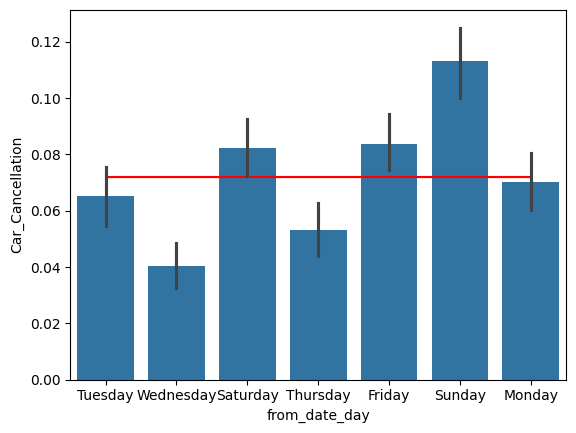

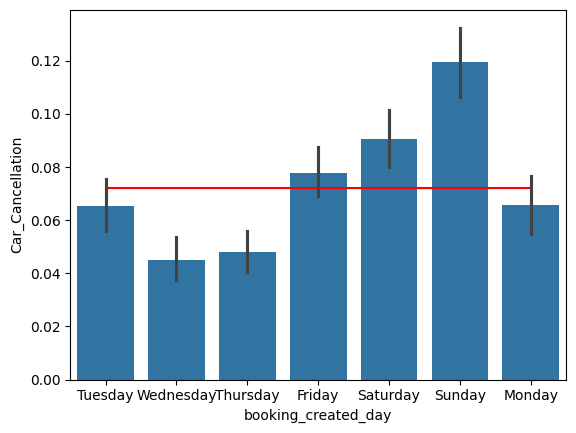

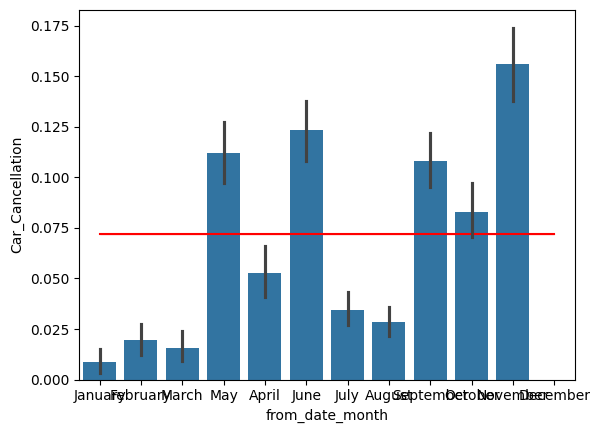

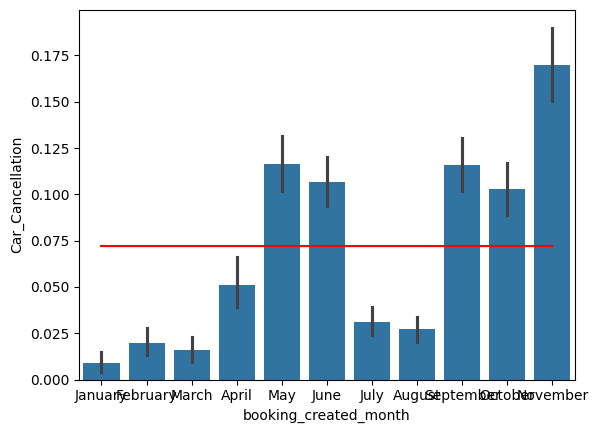

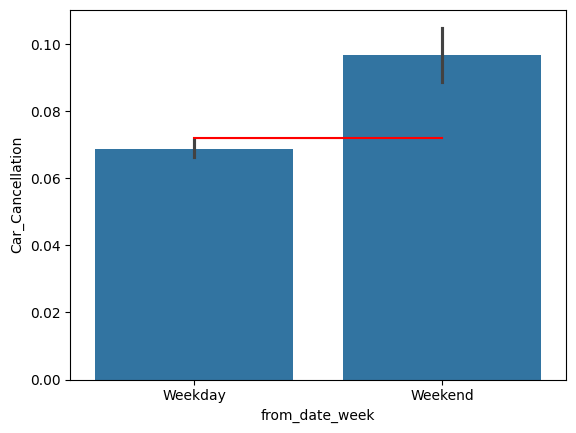

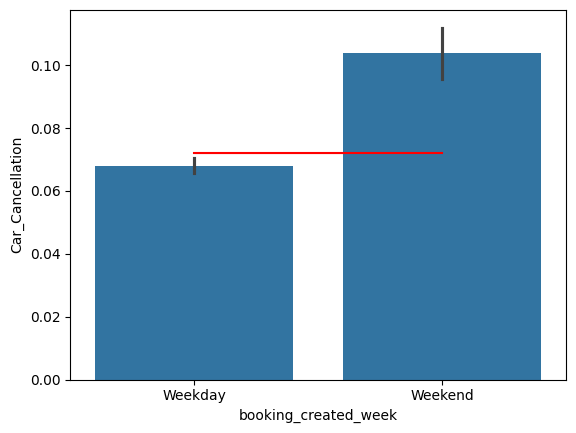

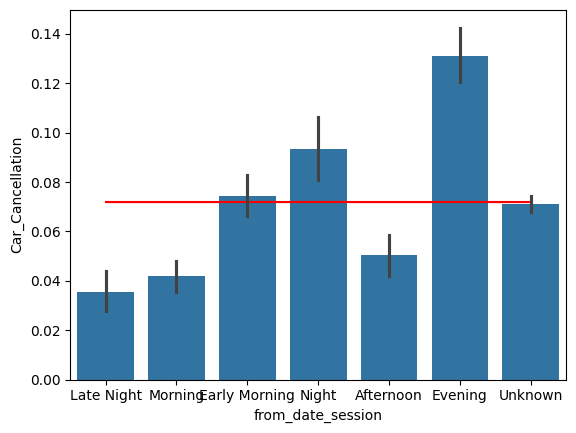

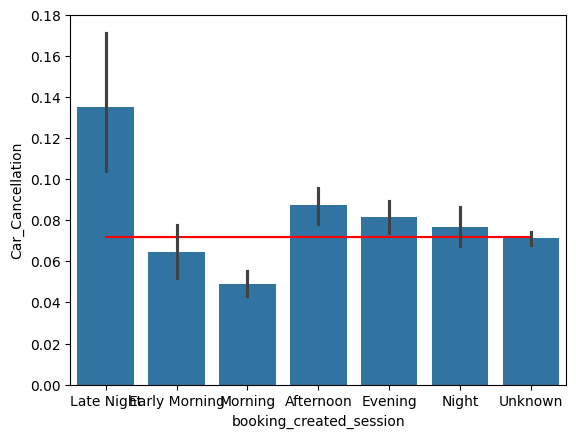

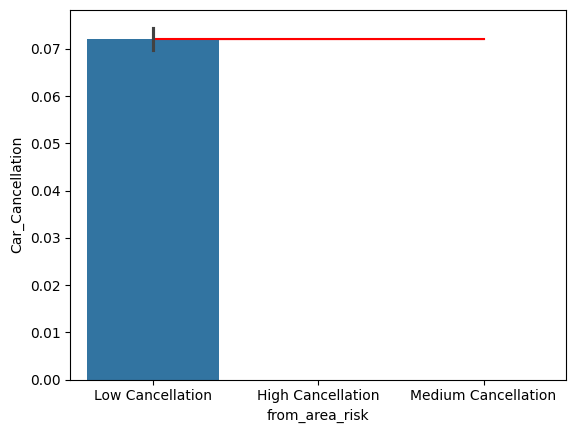

In [95]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

In [96]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(43431, 49)

In [97]:
X_char_dum.head()

,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,...,from_date_session_Night,from_date_session_Unknown,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night,booking_created_session_Unknown,from_area_risk_Low Cancellation,from_area_risk_Medium Cancellation
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [98]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [99]:
data_all.head()

,from_area_id,online_booking,mobile_site_booking,distance,booking_to_trip_gap_days,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,...,from_date_session_Night,from_date_session_Unknown,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night,booking_created_session_Unknown,from_area_risk_Low Cancellation,from_area_risk_Medium Cancellation
0,0.00,0,0,3.980687,0.0,21.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.00,0,0,14.004432,0.0,395.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.13,0,0,12.648909,0.0,22.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,0.00,0,0,9.534596,0.0,66.0,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.00,0,0,14.655467,0.0,67.0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [100]:
data_all.shape

(43431, 55)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_all,target,test_size=0.3,random_state=1)

In [102]:
X_train.head()

,from_area_id,online_booking,mobile_site_booking,distance,booking_to_trip_gap_days,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,...,from_date_session_Night,from_date_session_Unknown,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night,booking_created_session_Unknown,from_area_risk_Low Cancellation,from_area_risk_Medium Cancellation
21506,0.0,0,0,9.236426,2.0,2832.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
12367,0.0,0,1,1.809583,1.0,1504.0,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5983,0.0,0,0,13.558000,0.0,214.0,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
18513,0.0,0,0,18.456702,NaN,37.0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
16033,0.0,1,0,13.405912,NaN,128.0,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False


In [103]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
from sklearn.impute import SimpleImputer

# Impute missing values (numerical columns only)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

lr = LogisticRegression(random_state=4)
lr.fit(X_train_imputed, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,4
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [107]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

,estimator,DecisionTreeC...andom_state=4)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [108]:
gscv_dtc.best_params_

{'max_depth': 6, 'min_samples_split': 250}

In [109]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [111]:
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

,estimator,RandomForestC...andom_state=4)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [112]:
gscv_rfc.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [113]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [115]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Step 1: Create the imputer
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'

# Step 2: Fit on training data
X_train_imputed = imputer.fit_transform(X_train)

# Step 3: Transform test data
X_test_imputed = imputer.transform(X_test)

# Step 4: Train Logistic Regression
lr = LogisticRegression(random_state=4)
lr.fit(X_train_imputed, y_train)

# Step 5: Predict
y_pred_lr = lr.predict(X_test_imputed)

In [116]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [117]:
print('Logistic Regression Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))

Logistic Regression Metrics
Accuracy: 0.9286262471220261
Precision: 0.52
Recall: 0.027896995708154508
f1_score: 0.05295315682281059


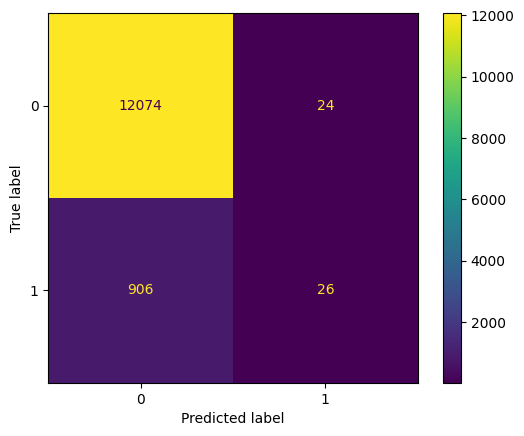

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test_imputed, y_test)



In [124]:
y_pred_dtc = dtc.predict(X_test)



In [125]:
from sklearn import metrics

print('📊 Decision Tree Metrics')
print('------------------------')
print('✅ Accuracy :', round(metrics.accuracy_score(y_test, y_pred_dtc), 4))
print('✅ Precision:', round(metrics.precision_score(y_test, y_pred_dtc), 4))
print('✅ Recall   :', round(metrics.recall_score(y_test, y_pred_dtc), 4))
print('✅ F1 Score :', round(metrics.f1_score(y_test, y_pred_dtc), 4))



📊 Decision Tree Metrics
------------------------
✅ Accuracy : 0.9289
✅ Precision: 0.5366
✅ Recall   : 0.0472
✅ F1 Score : 0.0868


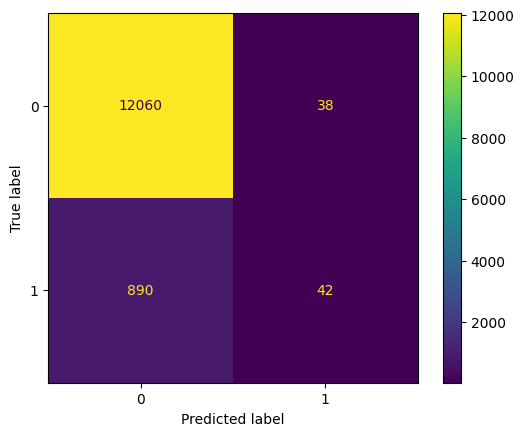

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dtc, X_test_imputed, y_test)


In [132]:
y_pred_rfc = rfc.predict(X_test_imputed)  # if you've imputed NaNs
# or
y_pred_rfc = rfc.predict(X_test)  # if using a pipeline


In [133]:
from sklearn import metrics

try:
    print('🌲 Random Forest Metrics')
    print('------------------------')
    print('✅ Accuracy :', round(metrics.accuracy_score(y_test, y_pred_rfc), 4))
    print('✅ Precision:', round(metrics.precision_score(y_test, y_pred_rfc), 4))
    print('✅ Recall   :', round(metrics.recall_score(y_test, y_pred_rfc), 4))
    print('✅ F1 Score :', round(metrics.f1_score(y_test, y_pred_rfc), 4))
except NameError:
    print("❌ Error: Make sure `y_pred_rfc` is defined (use `y_pred_rfc = rfc.predict(X_test_imputed)` or similar).")


🌲 Random Forest Metrics
------------------------
✅ Accuracy : 0.9285
✅ Precision: 0.0
✅ Recall   : 0.0
✅ F1 Score : 0.0


In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
from sklearn import metrics

try:
    print('🌲 Random Forest Metrics')
    print('------------------------')
    print('✅ Accuracy :', round(metrics.accuracy_score(y_test, y_pred_rfc), 4))
    print('✅ Precision:', round(metrics.precision_score(y_test, y_pred_rfc), 4))
    print('✅ Recall   :', round(metrics.recall_score(y_test, y_pred_rfc), 4))
    print('✅ F1 Score :', round(metrics.f1_score(y_test, y_pred_rfc), 4))
except NameError:
    print("❌ Error: Make sure `y_pred_rfc` is defined (use `y_pred_rfc = rfc.predict(X_test_imputed)` or similar).")

🌲 Random Forest Metrics
------------------------
✅ Accuracy : 0.9285
✅ Precision: 0.0
✅ Recall   : 0.0
✅ F1 Score : 0.0


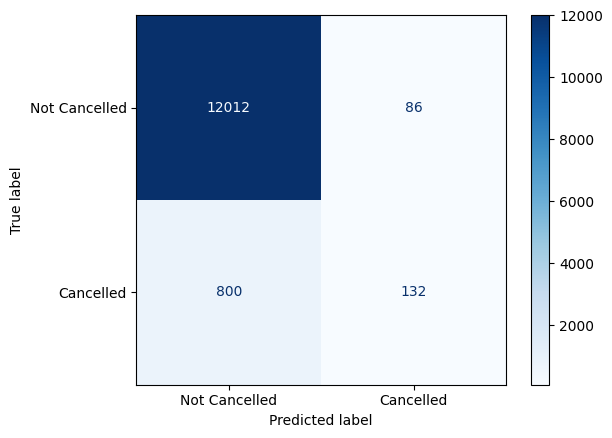

In [138]:
ConfusionMatrixDisplay.from_estimator(
    rfc,
    X_test_imputed,
    y_test,
    cmap='Blues',
    display_labels=['Not Cancelled', 'Cancelled']
)

